In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import sys
sys.path.append('../../../')

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
from src.utils.dates import get_nyse_business_dates

In [8]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [9]:
from src.settings import Settings

In [10]:
from src.utils.io.read import PreprocessedDataReader

In [11]:
from src.preprocessing.base import FutureTicker

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.HEATING_OIL)

In [14]:
dataset.shape

(809, 81)

In [15]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
807,2025-06-24,HO,-101062.0,60660.0,161722.0,10738.0,52627.0,41889.0,-6949.0,-1096.0,...,116650.0,-221825.0,-247835.0,104997.0,-22.00,10.81,-22.15,5.59,-22.31,4.55
808,2025-07-01,HO,-104727.0,71449.0,176176.0,12898.0,54458.0,41560.0,-3665.0,-6949.0,...,-221825.0,NaN,104997.0,NaN,10.81,NaN,5.59,NaN,4.55,NaN


In [16]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [17]:
dataset['Commercial_NetPosition'].describe()

count       809.000000
mean     -88936.087763
std       27763.539642
min     -159660.000000
25%     -107553.000000
50%      -87631.000000
75%      -69721.000000
max      -13850.000000
Name: Commercial_NetPosition, dtype: float64

In [18]:
dataset['ManagedMoney_NetPosition'].describe()

count      809.000000
mean     11310.650185
std      20265.543668
min     -34954.000000
25%      -2699.000000
50%      12014.000000
75%      24770.000000
max      67696.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [19]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

231

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [21]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [22]:
# for name in [ 'prior_cumulative_5D_F1_Volume',
#                  'prior_cumulative_5D_F2_Volume',
#                  'prior_cumulative_5D_F1MinusF2_Volume' ,
#             'F1_RolledPrice',
#  'F2_RolledPrice',
#  'F3_RolledPrice']:
#     dataset[f'{name}_change'] = dataset[name] - dataset[name].shift(1)
#     dataset[f'next_{name}_change'] =  dataset[name].shift(-1) - dataset[name] 
    
    

In [23]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [24]:
unscaled_response_names= ['Commercial_NetPosition_change',
                          'CommercialLongPosition_change',
                          'CommercialShortPosition_change']
scaled_response_names = ['Commercial_NetPosition_to_openinterest_change',
                         'CommercialLongPosition_to_openinterest_change',
                         'CommercialShortPosition_to_openinterest_change']
feature_names =  ['prior_report_Commercial_NetPosition_change',
                  'prior_report_CommercialLongPosition_change',
                  'prior_report_CommercialShortPosition_change',
                  'prior_report_Commercial_NetPosition_to_openinterest_change',
                  'prior_report_CommercialLongPosition_to_openinterest_change',
                  'prior_report_CommercialShortPosition_to_openinterest_change',
                  'prior_report_SyntheticF1MinusF2_RolledPrice_change',
                  'prior_cumulative_5D_F1_Volume_change',
                  'prior_cumulative_5D_F2_Volume_change',
                  'prior_cumulative_5D_F1MinusF2_Volume_change',
                  'prior_5D_F1_OI_change',
                  'prior_5D_F2_OI_change',
                  'prior_5D_AGG_OI_change',
                  'prior_5D_F1MinusF2_openinterest_change',
                  'F1_RolledPrice_rolling_20D_volatility',
                  'F2_RolledPrice_rolling_20D_volatility',
                  'F3_RolledPrice_rolling_20D_volatility',
                  'F1_RolledPrice_change',
                  'F2_RolledPrice_change',
                  'F3_RolledPrice_change'
                 
                 ]

In [25]:
?get_features_responses_correlation

Signature:
get_features_responses_correlation(
    dataset: pandas.core.frame.DataFrame,
    features: list[str],
    responses: list[str],
    method: str = 'spearman',
) -> pandas.core.frame.DataFrame
Docstring: " Computes the correlation between a list of features and a list of responses 
File:      ~/Documents/Projects/omroot_repos/COTAME/research/metrics.py
Type:      function

In [26]:
get_features_responses_correlation(dataset = dataset,
                                   features = feature_names,
                                   responses=unscaled_response_names).sort_values(by = unscaled_response_names[0])

,Feature,Commercial_NetPosition_change,CommercialLongPosition_change,CommercialShortPosition_change
17,F1_RolledPrice_change,-0.516600,-0.117792,0.280794
18,F2_RolledPrice_change,-0.514001,-0.108764,0.287921
19,F3_RolledPrice_change,-0.510515,-0.108866,0.286019
2,prior_report_CommercialShortPosition_change,-0.122964,-0.056306,0.049771
5,prior_report_CommercialShortPosition_to_openin...,-0.105633,-0.067006,0.021312
12,prior_5D_AGG_OI_change,-0.057492,0.718214,0.709684
8,prior_cumulative_5D_F2_Volume_change,-0.054673,-0.172672,-0.134296
11,prior_5D_F2_OI_change,-0.034301,0.224483,0.234358
1,prior_report_CommercialLongPosition_change,-0.023724,-0.020213,0.010550
4,prior_report_CommercialLongPosition_to_openint...,-0.006430,-0.012319,-0.000048


In [27]:
get_features_responses_correlation(dataset = dataset,
                                   features = feature_names,
                                   responses=scaled_response_names).sort_values(by = scaled_response_names[0])

,Feature,Commercial_NetPosition_to_openinterest_change,CommercialLongPosition_to_openinterest_change,CommercialShortPosition_to_openinterest_change
17,F1_RolledPrice_change,-0.421980,-0.183224,0.315736
18,F2_RolledPrice_change,-0.416310,-0.172956,0.319805
19,F3_RolledPrice_change,-0.414454,-0.170279,0.319805
8,prior_cumulative_5D_F2_Volume_change,-0.146642,-0.120181,0.002092
2,prior_report_CommercialShortPosition_change,-0.093490,-0.081207,0.032611
5,prior_report_CommercialShortPosition_to_openin...,-0.084046,-0.075394,0.029215
14,F1_RolledPrice_rolling_20D_volatility,-0.013290,-0.010985,0.015310
16,F3_RolledPrice_rolling_20D_volatility,-0.012211,0.000749,0.025917
15,F2_RolledPrice_rolling_20D_volatility,-0.011191,-0.002290,0.021607
1,prior_report_CommercialLongPosition_change,-0.008913,-0.048745,-0.037337


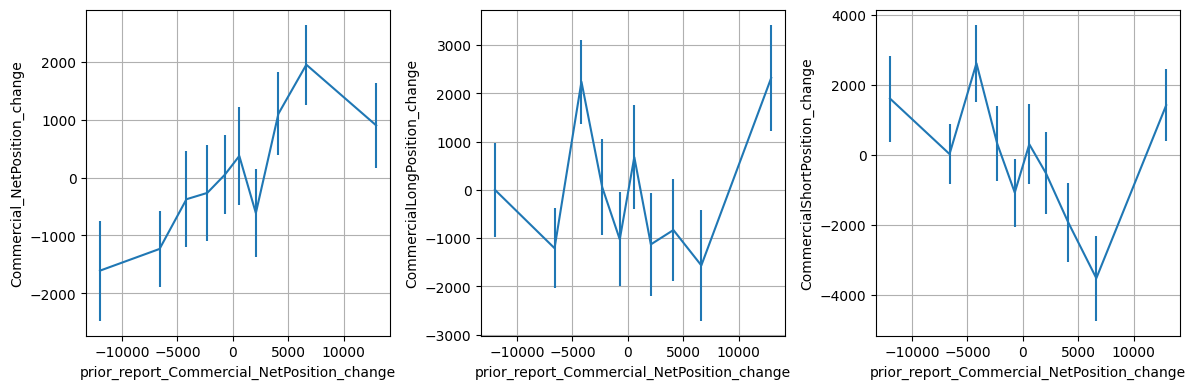

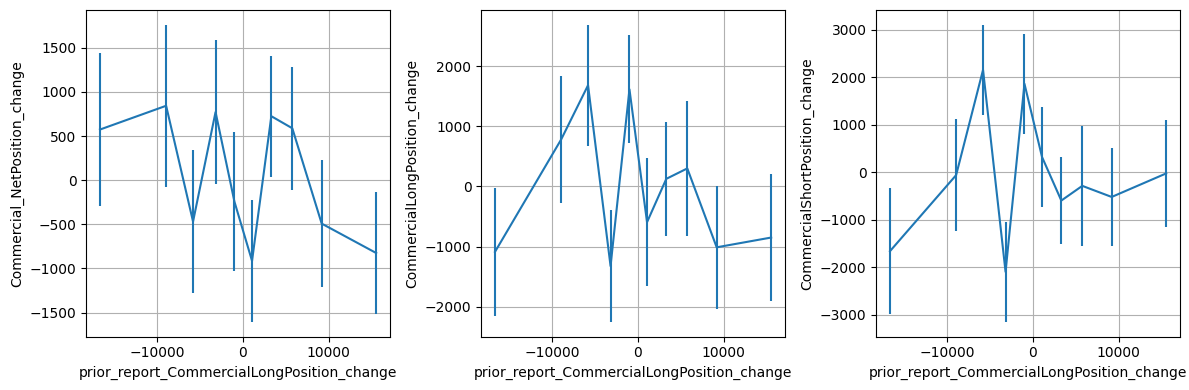

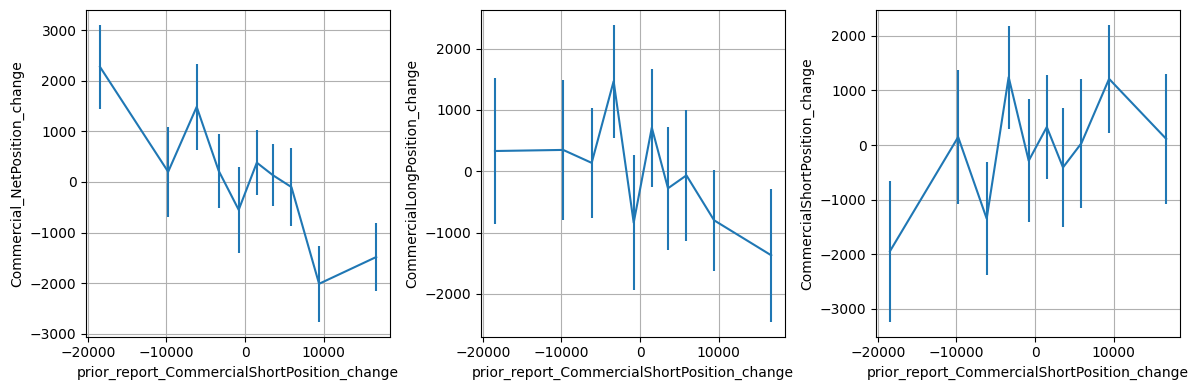

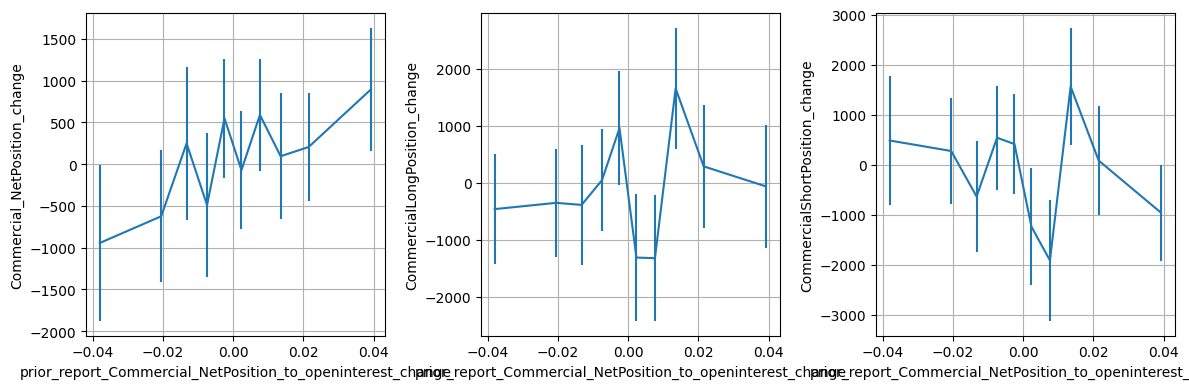

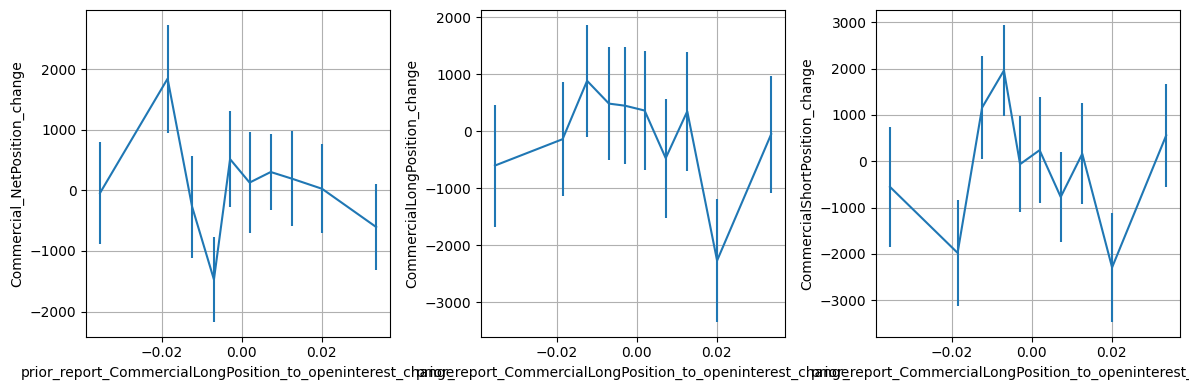

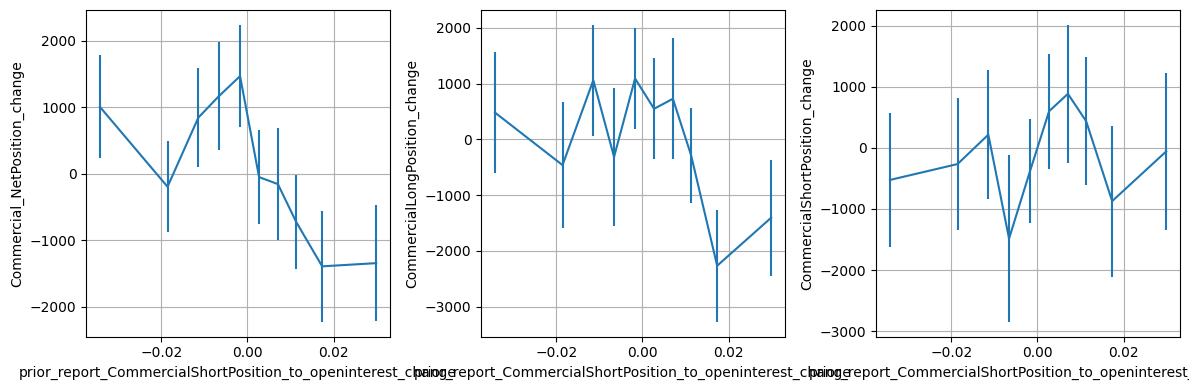

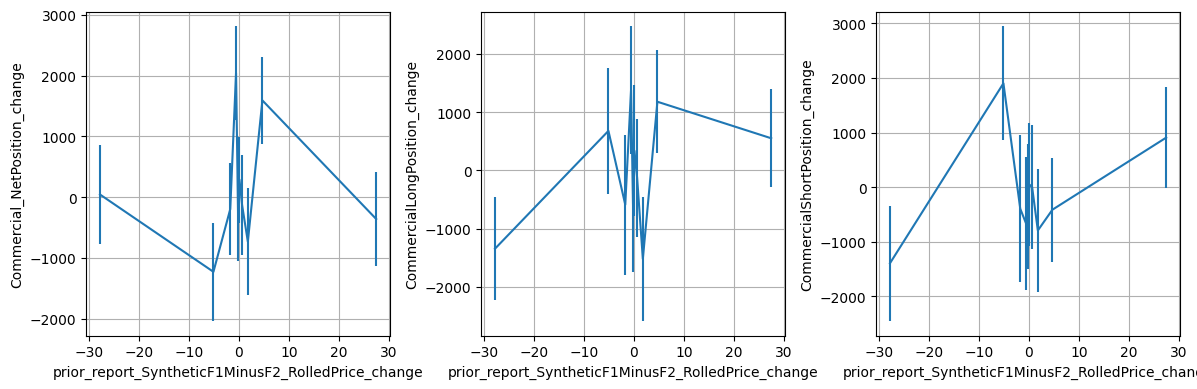

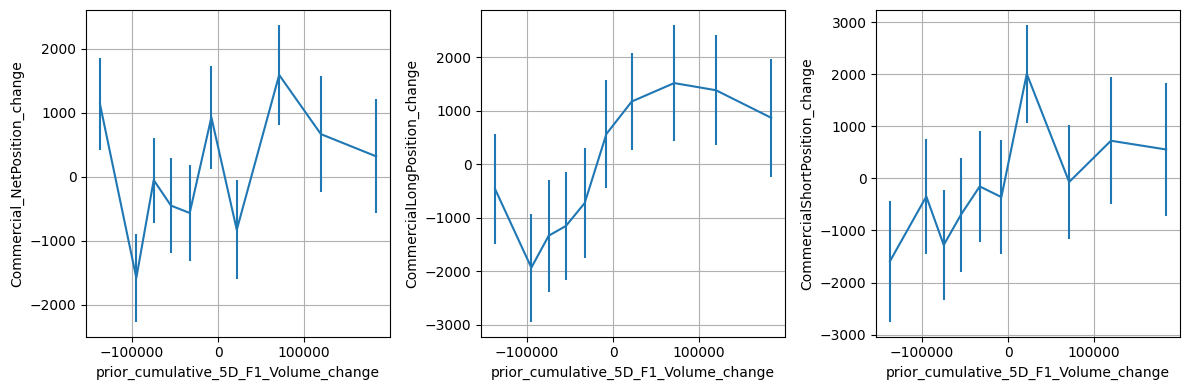

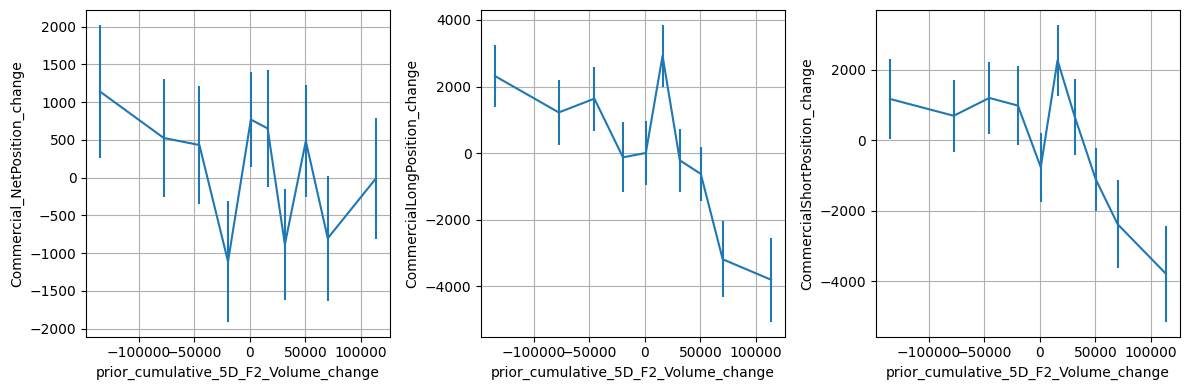

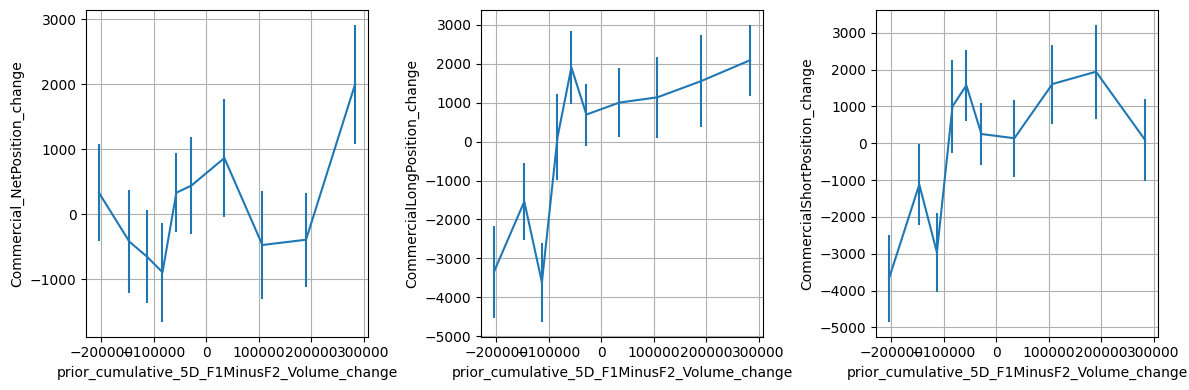

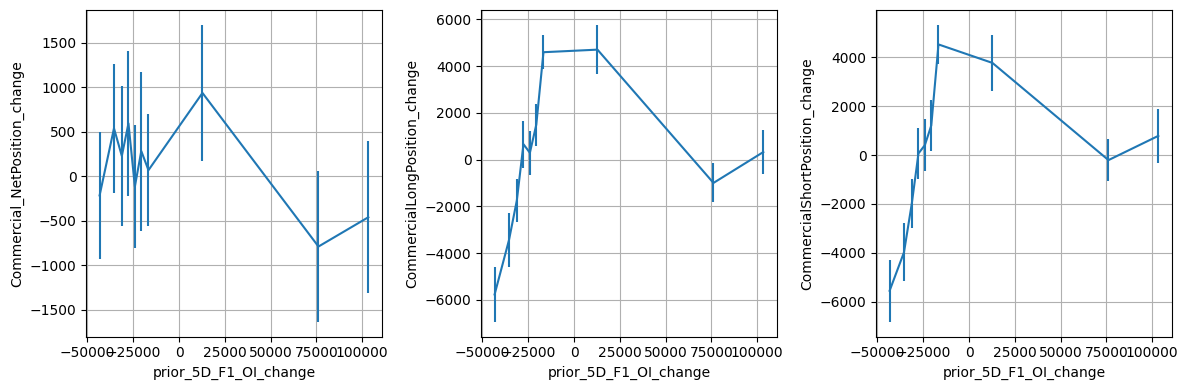

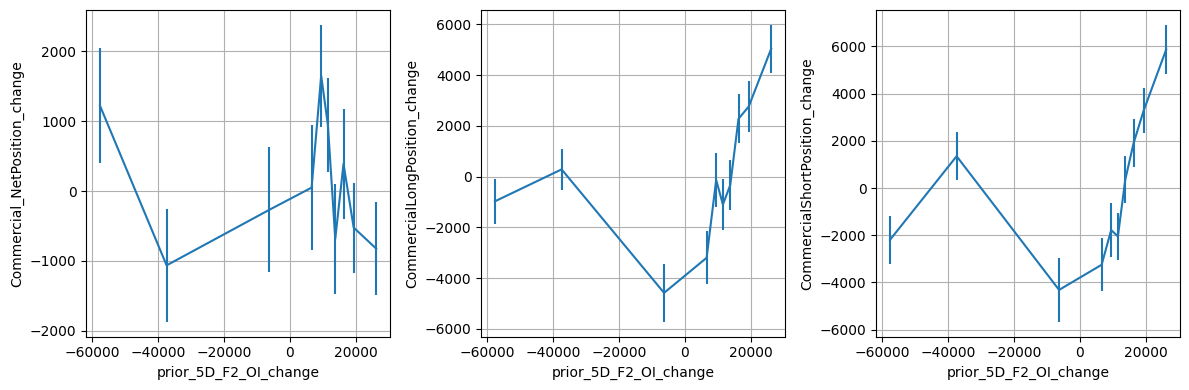

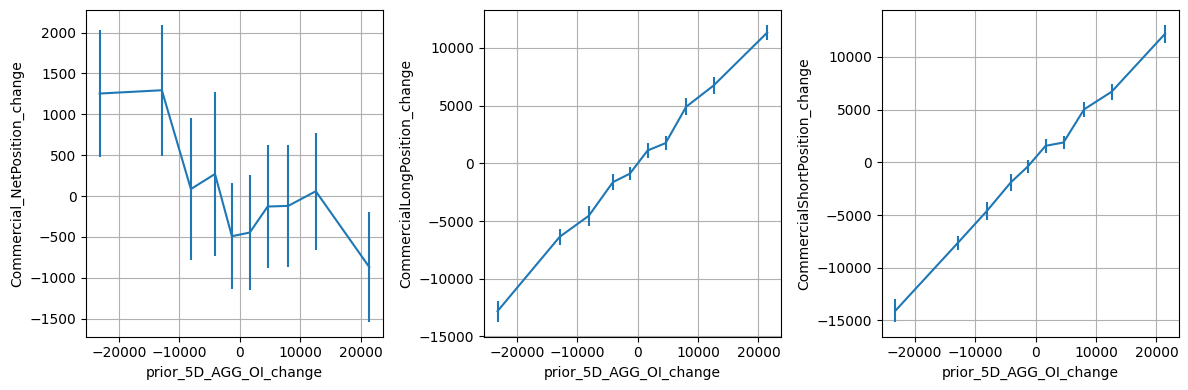

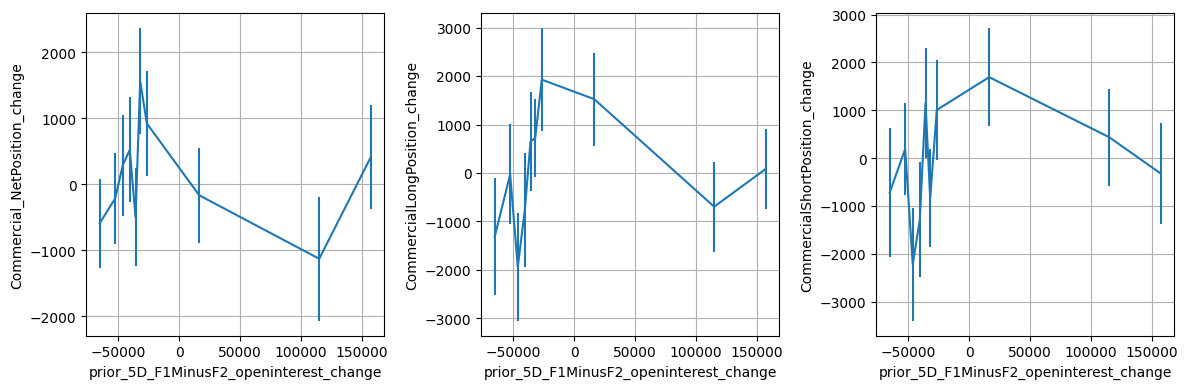

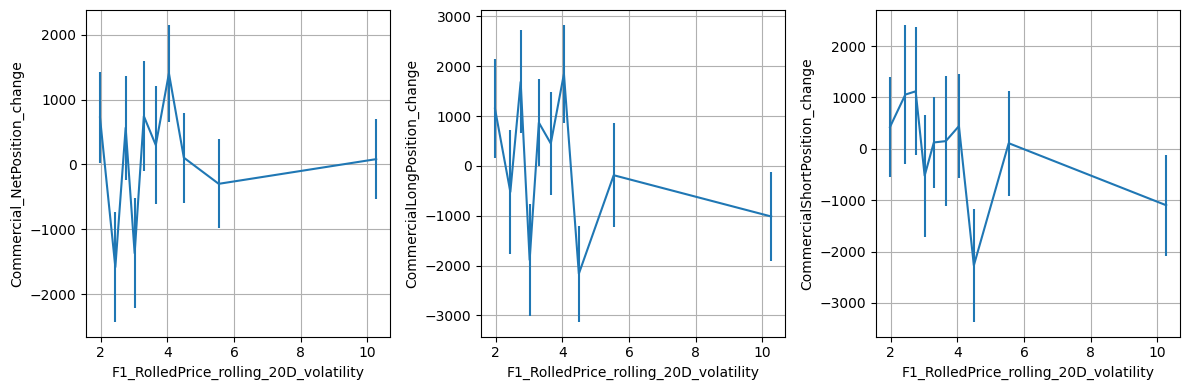

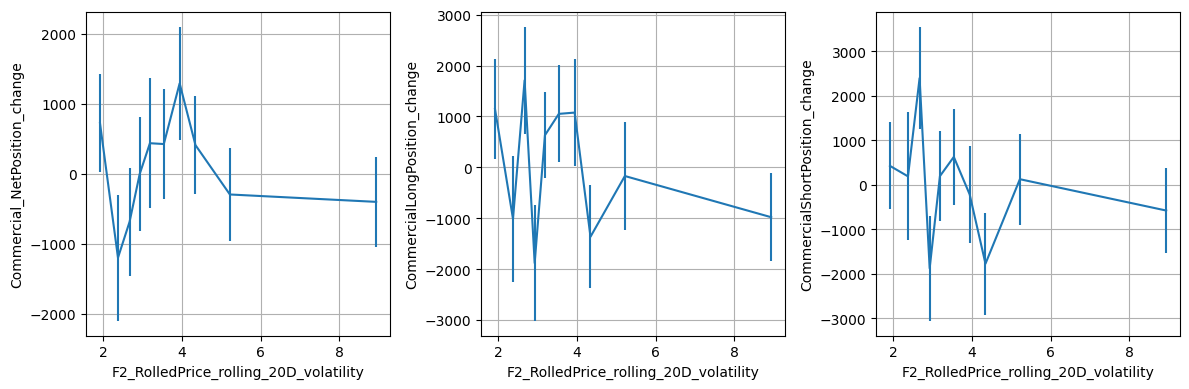

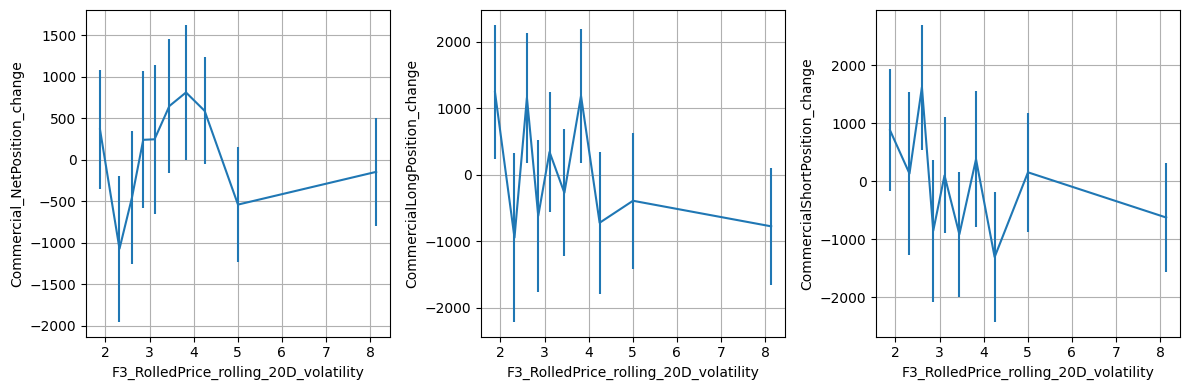

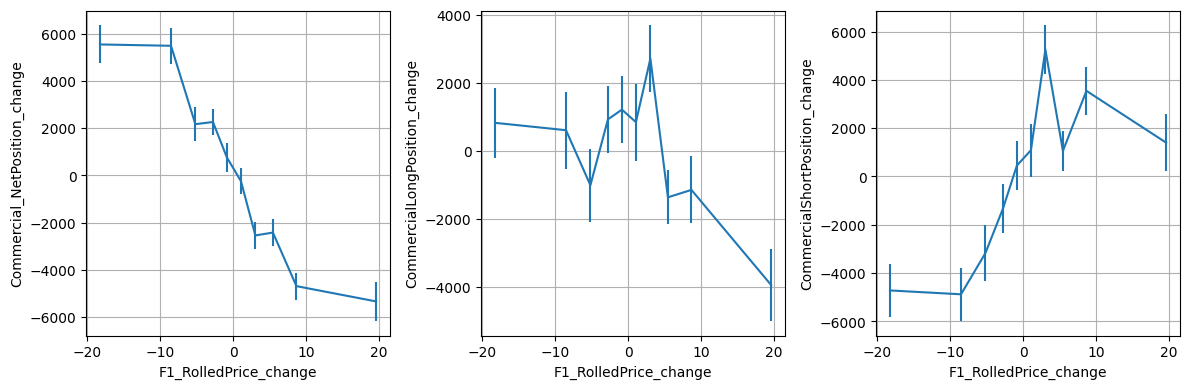

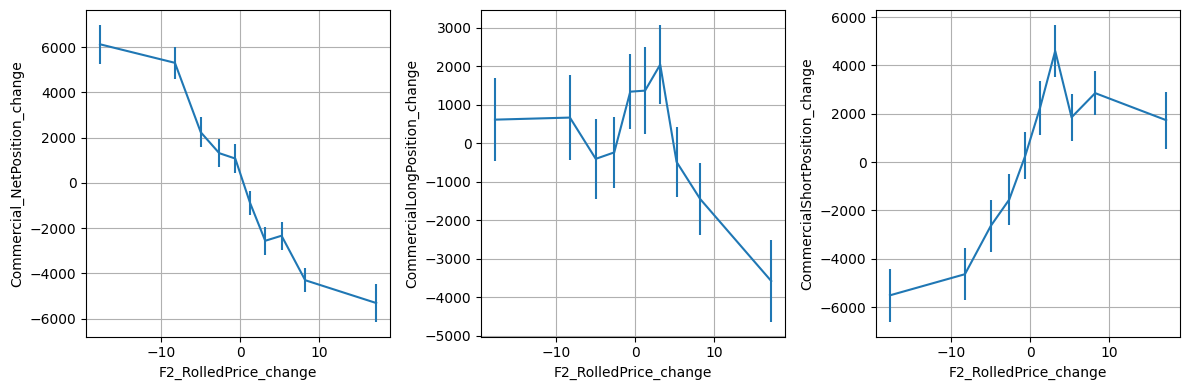

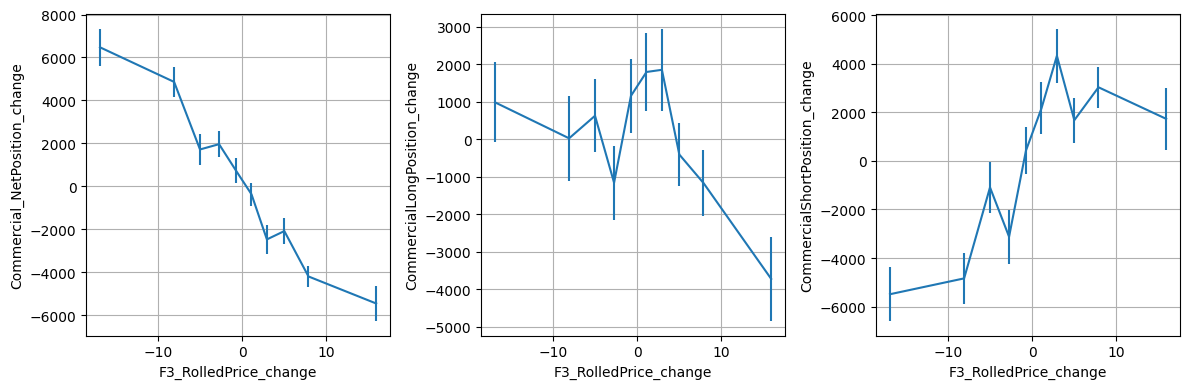

In [28]:
for  f  in feature_names:
    plt.rcParams["figure.figsize"] = (12,4)
    plt.subplot(1, 3, 1)
    _=plot_bin_summary_of_xy(
                    x = dataset[f],
                    y = dataset['Commercial_NetPosition_change'],
                    k= 10 ,
        xlabel = f, 
        ylabel = 'Commercial_NetPosition_change'
      )
    plt.grid()
    plt.subplot(1, 3, 2)
    _=plot_bin_summary_of_xy(
                        x = dataset[f],
                        y = dataset['CommercialLongPosition_change'],
                        k= 10 ,
            xlabel = f, 
            ylabel = 'CommercialLongPosition_change'
          )
    plt.grid()
    plt.subplot(1, 3, 3)
    _=plot_bin_summary_of_xy(
                        x = dataset[f],
                        y = dataset['CommercialShortPosition_change'],
                        k= 10 ,
            xlabel = f, 
            ylabel = 'CommercialShortPosition_change'
          )
    plt.tight_layout()
    plt.grid()
    plt.show()
    plt.close()

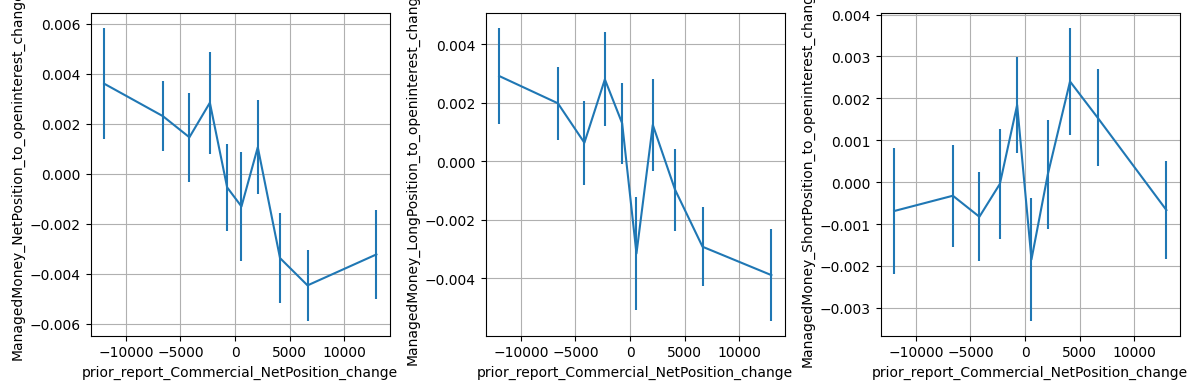

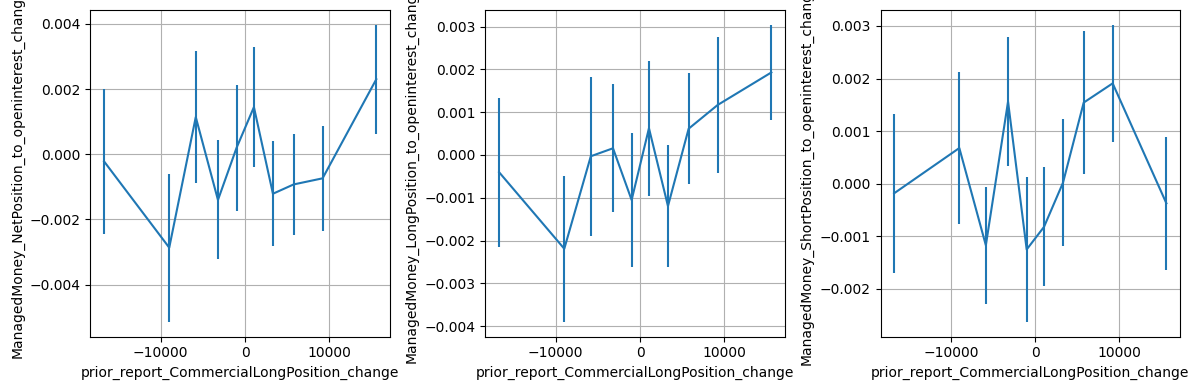

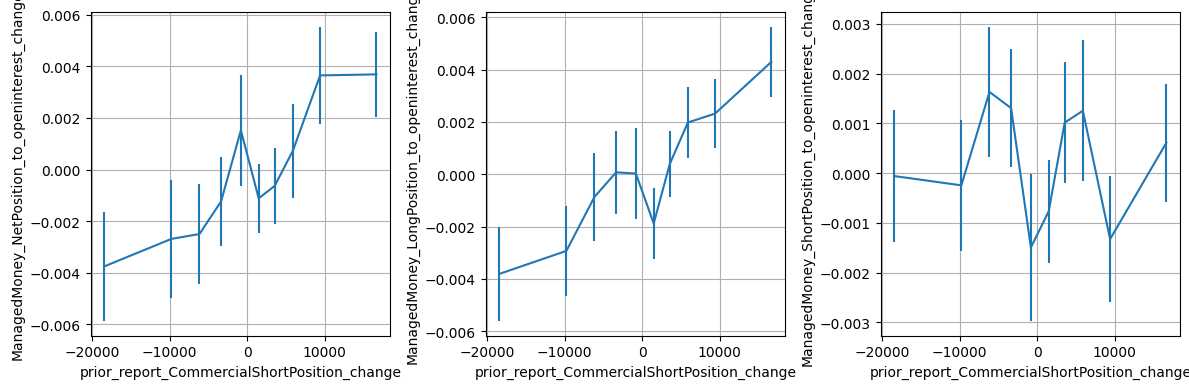

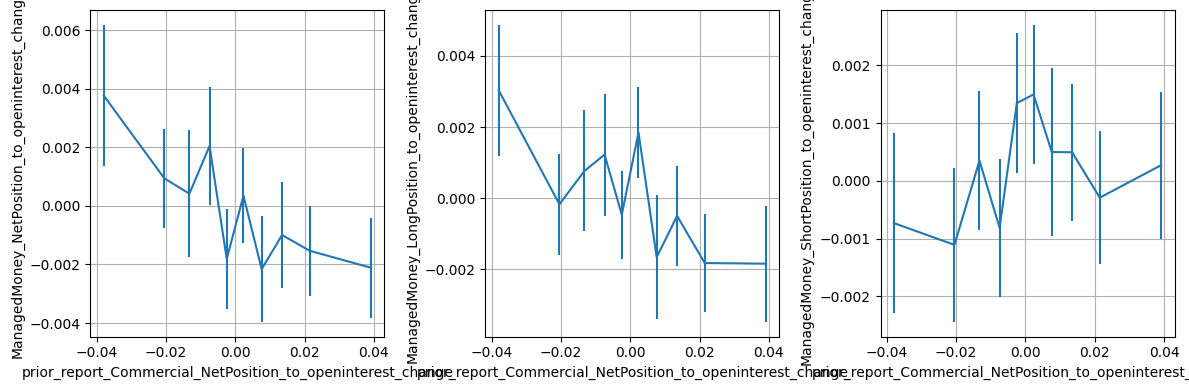

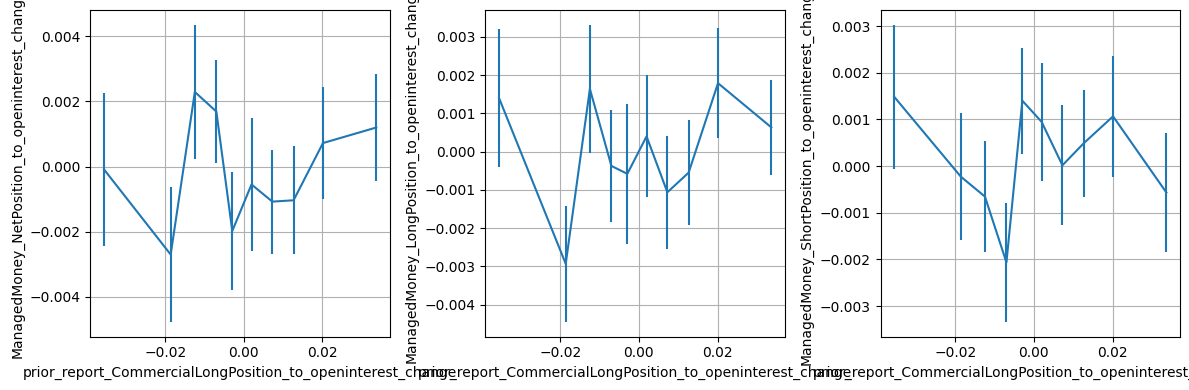

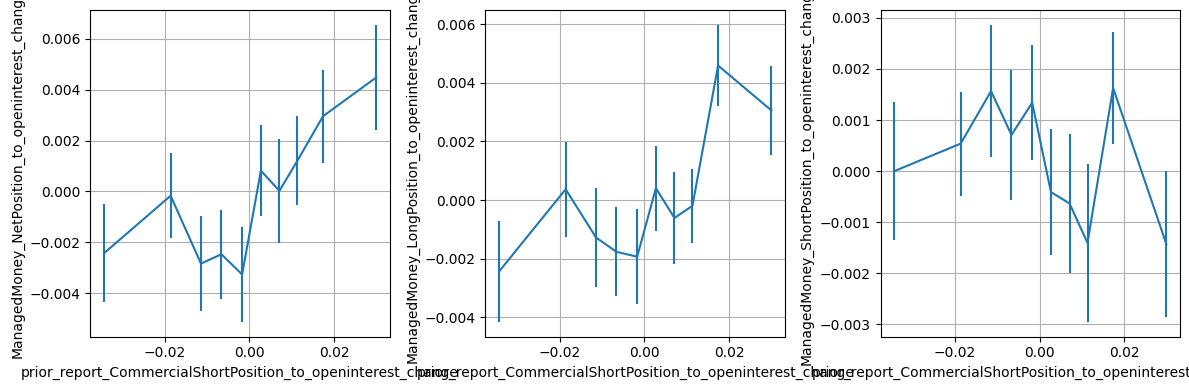

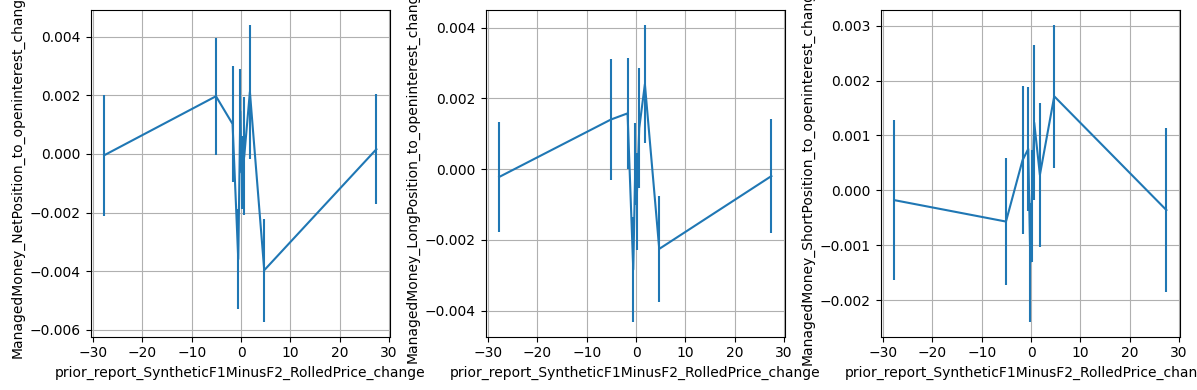

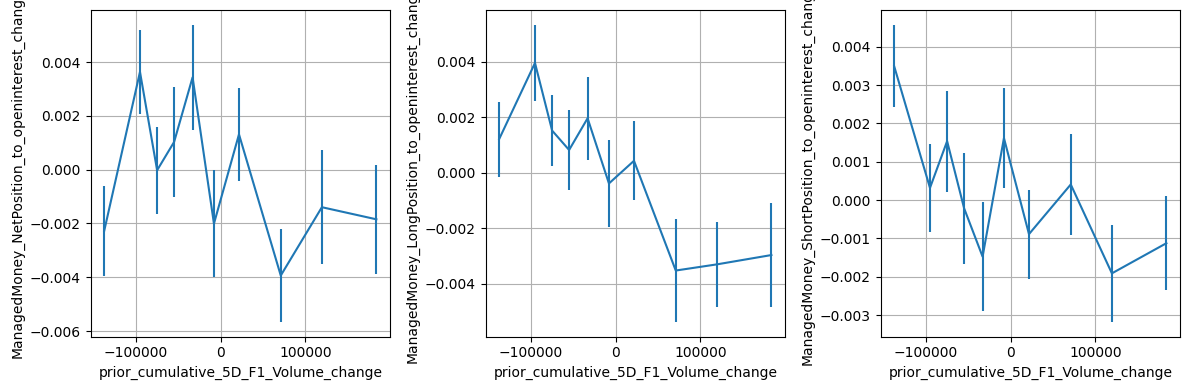

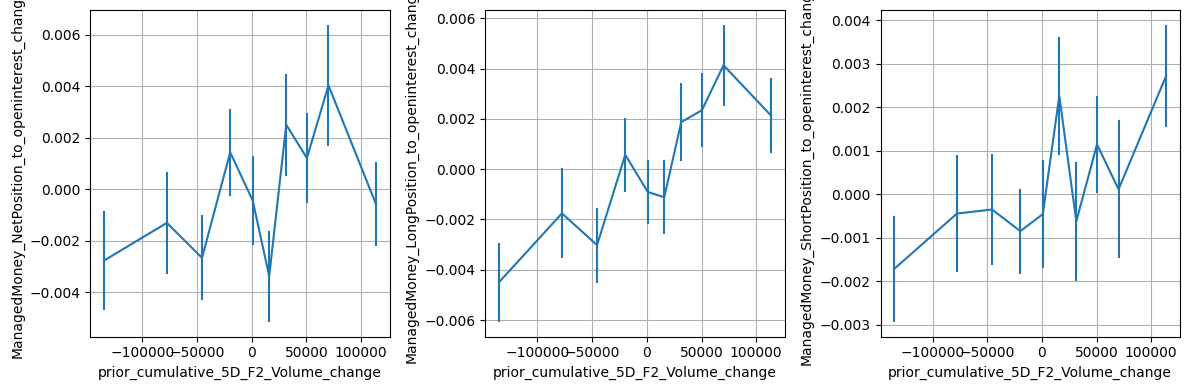

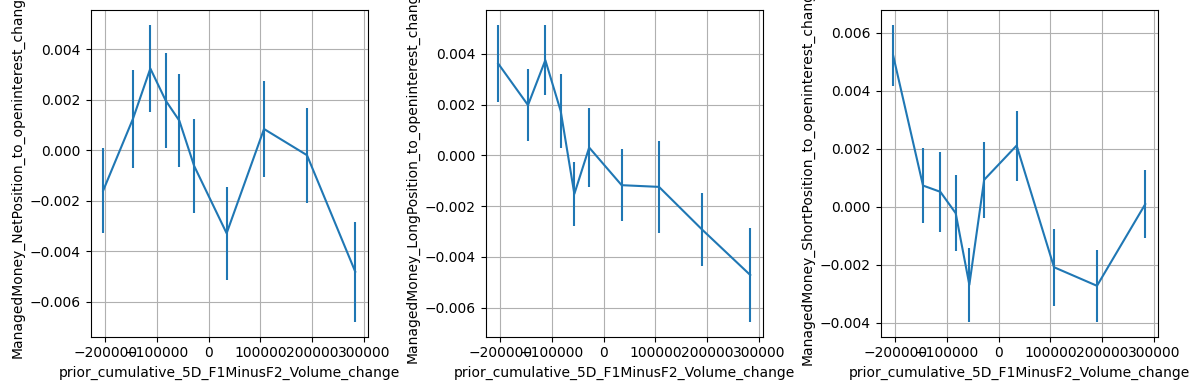

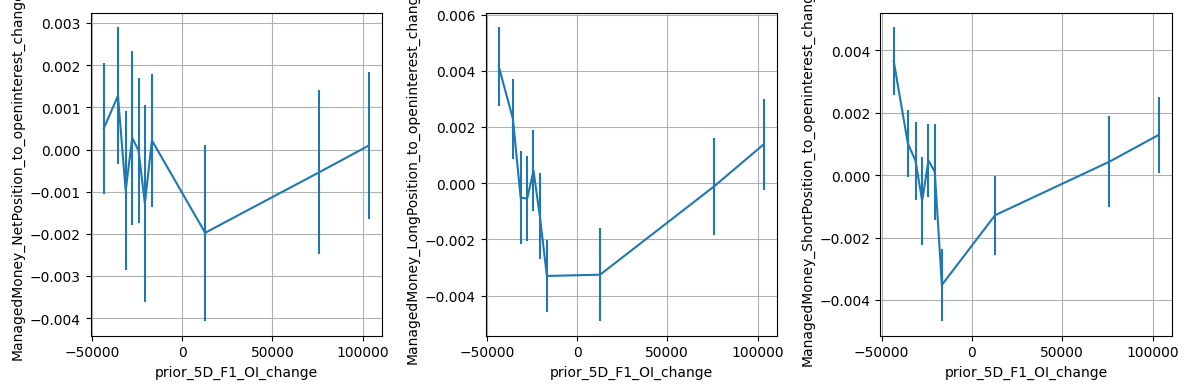

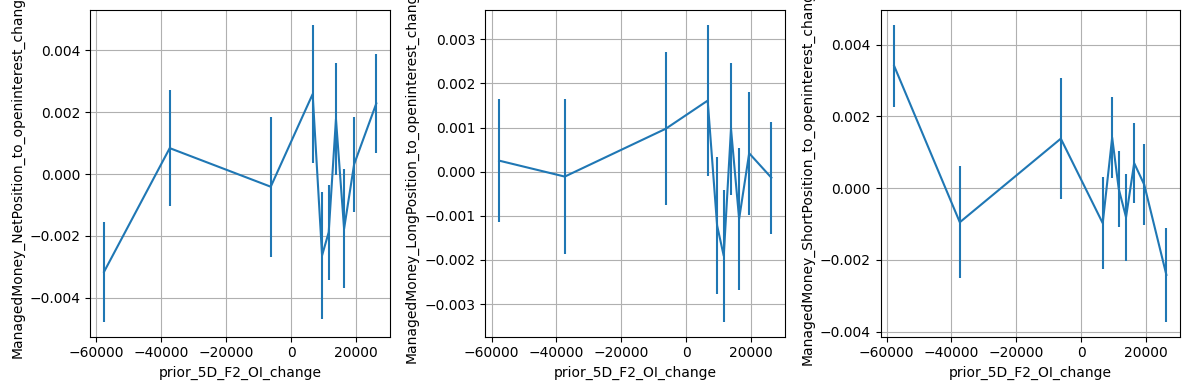

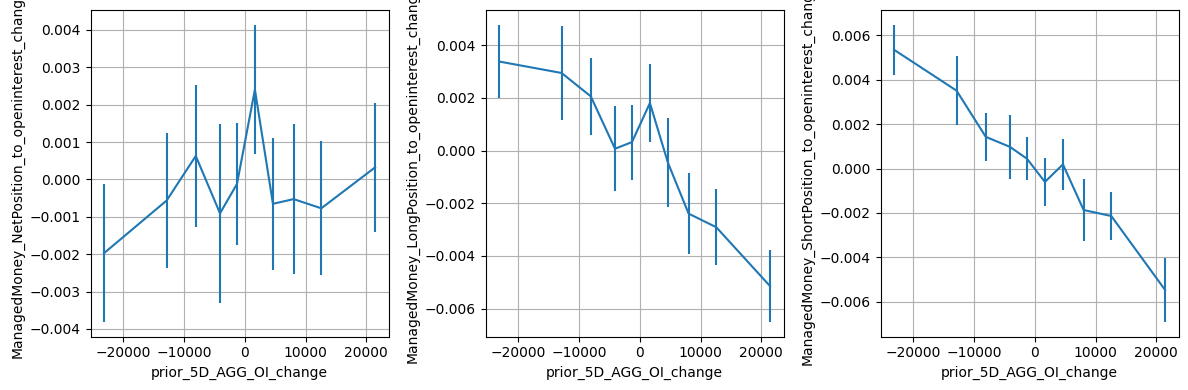

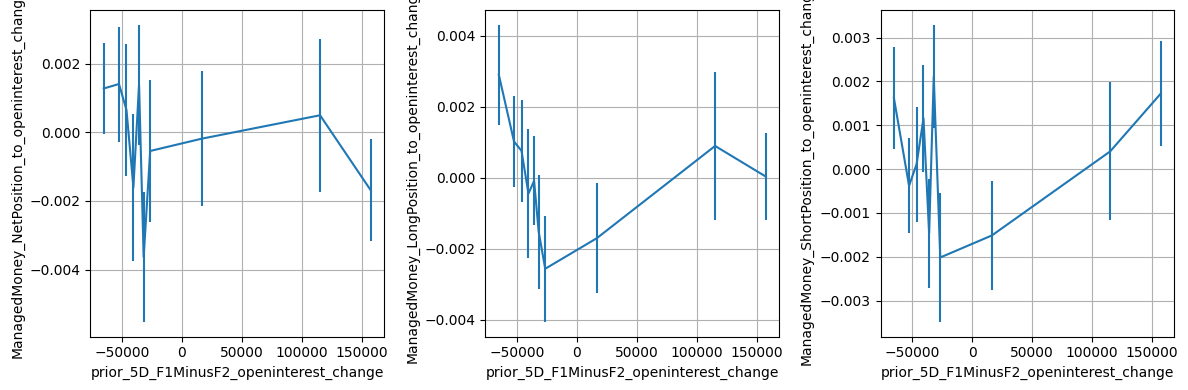

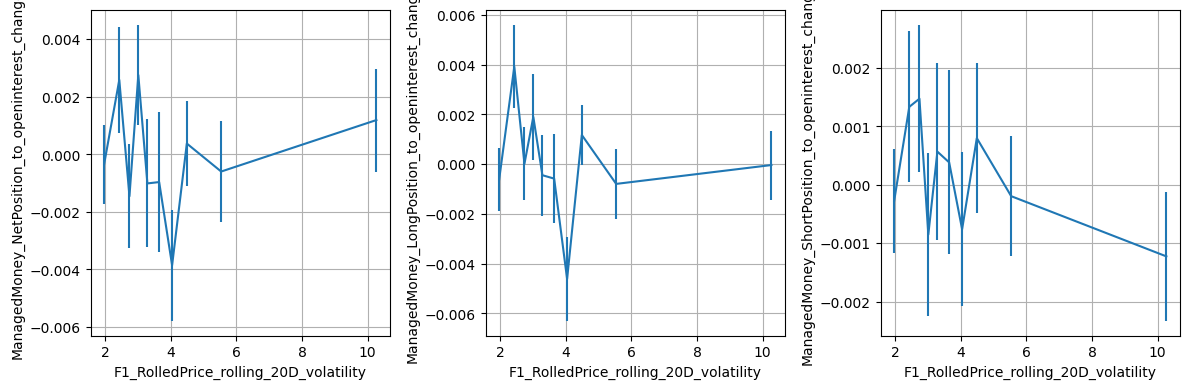

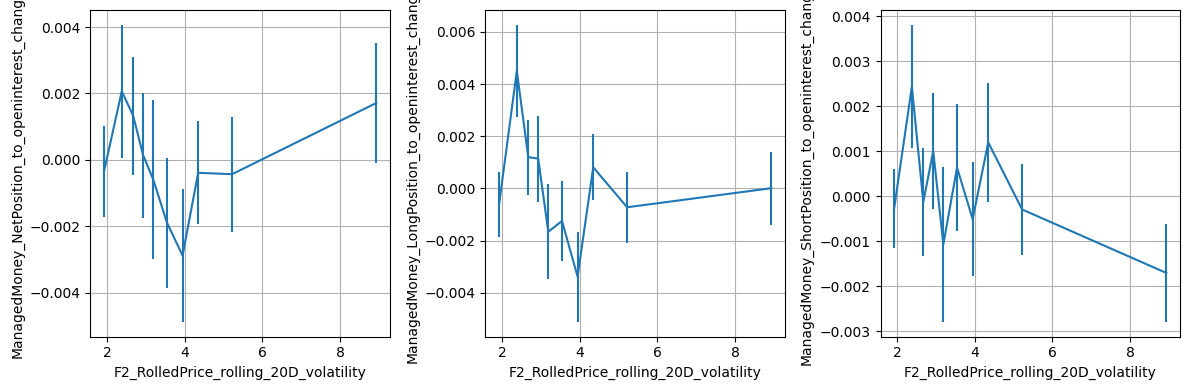

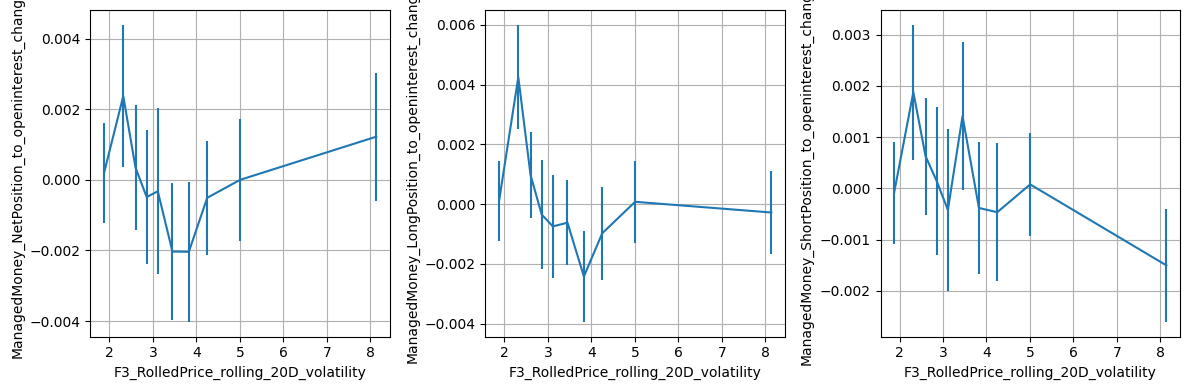

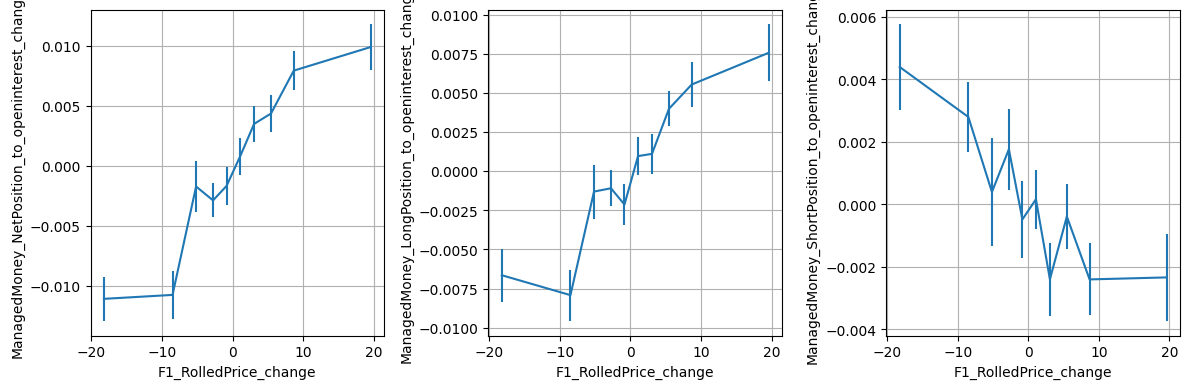

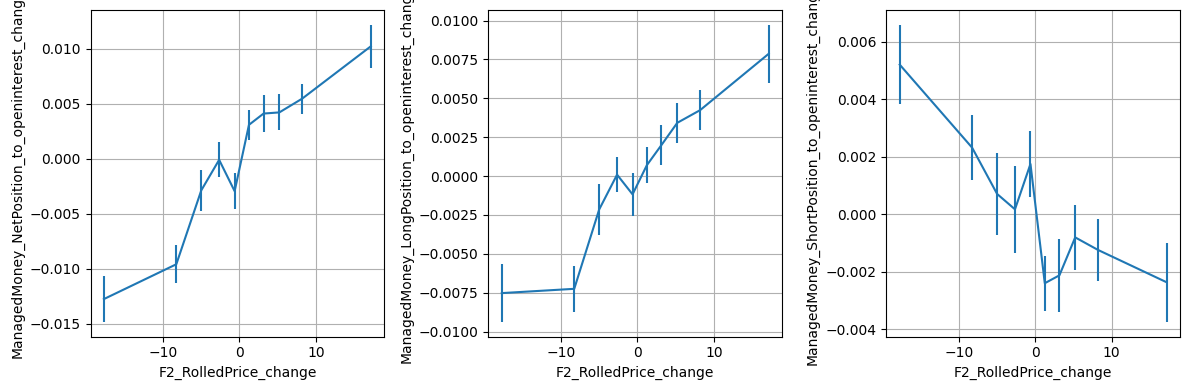

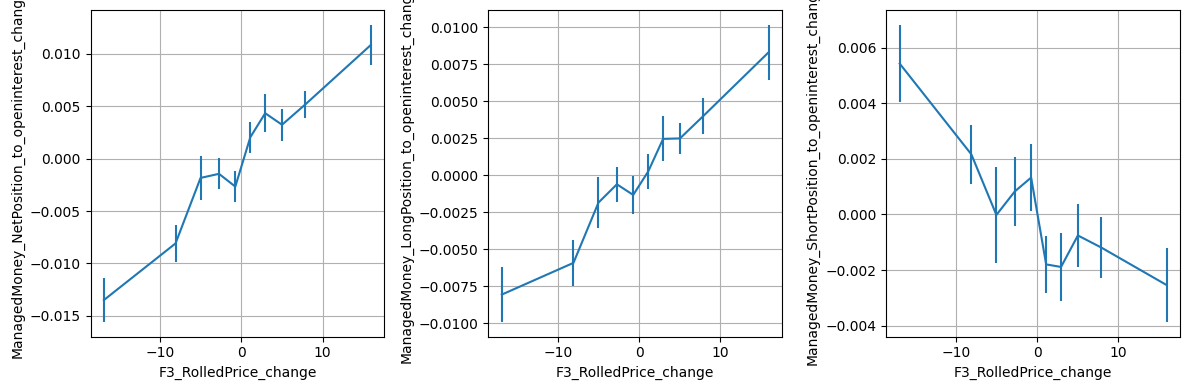

In [29]:
for  f  in feature_names:
    plt.rcParams["figure.figsize"] = (12,4)
    plt.subplot(1, 3, 1)
    _=plot_bin_summary_of_xy(
                    x = dataset[f],
                    y = dataset['ManagedMoney_NetPosition_to_openinterest_change'],
                    k= 10 ,
        xlabel = f, 
        ylabel = 'ManagedMoney_NetPosition_to_openinterest_change'
      )
    plt.grid()    
    plt.subplot(1, 3, 2)
    _=plot_bin_summary_of_xy(
                    x = dataset[f],
                    y = dataset['ManagedMoney_LongPosition_to_openinterest_change'],
                    k= 10 ,
        xlabel = f, 
        ylabel = 'ManagedMoney_LongPosition_to_openinterest_change'
      )
    plt.grid()    
    plt.subplot(1, 3, 3)
    _=plot_bin_summary_of_xy(
                    x = dataset[f],
                    y = dataset['ManagedMoney_ShortPosition_to_openinterest_change'],
                    k= 10 ,
        xlabel = f, 
        ylabel = 'ManagedMoney_ShortPosition_to_openinterest_change'
      )
    plt.tight_layout()
    
    plt.grid()
    plt.show()
    plt.close()

In [30]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [31]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [32]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [33]:
cv = CombinatorialPurgedCV(n_partitions=10,
                           k=2,
                           purge_amount=10)

In [34]:
Xy = dataset[['tradeDate']+feature_names+unscaled_response_names+scaled_response_names].dropna()
Xy.reset_index(drop=True, inplace= True)

In [35]:
relevance_model = HistGradientBoostingRegressor(max_iter=10)
redundancy_model = HistGradientBoostingRegressor(max_iter=10)

In [36]:
from  research.feature_selection.master_selector import MasterSelector

In [37]:
selected_features_by_response = {}
for response in ['Commercial_NetPosition_change',
                'CommercialLongPosition_change',
                'CommercialShortPosition_change',
                'Commercial_NetPosition_to_openinterest_change',
                'CommercialLongPosition_to_openinterest_change',
                'CommercialShortPosition_to_openinterest_change']:
    print(response)
    master_selector_builder = MasterSelector( cv = cv,
                                     relevance_model = relevance_model,
                                     redundancy_model = redundancy_model,
                                     feature_names  = feature_names,
                                     response_name  = response,
                                     feature_similarity_method  = 'pearson',
                                     is_classification  = False,
                                     verbose  = False
                                     ) 
    master_selector_builder.fit(dataset=Xy)
    selected_feature_names = master_selector_builder.selected_feature_names
    print(selected_feature_names)
    selected_features_by_response[response] = selected_feature_names

Commercial_NetPosition_change
For q=39.0, the optimal variance is 1.0 , and objective function is 2178.24,and max random eigen value: 1.35,and # of signal factors: 6
['prior_report_CommercialShortPosition_change', 'prior_report_CommercialShortPosition_to_openinterest_change', 'F2_RolledPrice_rolling_20D_volatility', 'F1_RolledPrice_change']
CommercialLongPosition_change
For q=39.0, the optimal variance is 1.0 , and objective function is 2178.24,and max random eigen value: 1.35,and # of signal factors: 6
['prior_5D_F2_OI_change', 'F1_RolledPrice_change', 'prior_report_CommercialShortPosition_to_openinterest_change', 'prior_5D_AGG_OI_change']
CommercialShortPosition_change
For q=39.0, the optimal variance is 1.0 , and objective function is 2178.24,and max random eigen value: 1.35,and # of signal factors: 6
['F1_RolledPrice_rolling_20D_volatility', 'F1_RolledPrice_change', 'prior_report_CommercialShortPosition_change', 'prior_5D_AGG_OI_change']
Commercial_NetPosition_to_openinterest_chang

In [38]:
selected_features_by_response

{'Commercial_NetPosition_change': ['prior_report_CommercialShortPosition_change',
  'prior_report_CommercialShortPosition_to_openinterest_change',
  'F2_RolledPrice_rolling_20D_volatility',
  'F1_RolledPrice_change'],
 'CommercialLongPosition_change': ['prior_5D_F2_OI_change',
  'F1_RolledPrice_change',
  'prior_report_CommercialShortPosition_to_openinterest_change',
  'prior_5D_AGG_OI_change'],
 'CommercialShortPosition_change': ['F1_RolledPrice_rolling_20D_volatility',
  'F1_RolledPrice_change',
  'prior_report_CommercialShortPosition_change',
  'prior_5D_AGG_OI_change'],
 'Commercial_NetPosition_to_openinterest_change': ['F2_RolledPrice_rolling_20D_volatility',
  'prior_report_CommercialShortPosition_to_openinterest_change',
  'prior_5D_AGG_OI_change',
  'F1_RolledPrice_change'],
 'CommercialLongPosition_to_openinterest_change': ['prior_cumulative_5D_F2_Volume_change',
  'F1_RolledPrice_change',
  'prior_report_CommercialShortPosition_to_openinterest_change',
  'prior_5D_AGG_OI_chan

In [39]:
import json
with open("ho_cot_comm_nowcast_selected_features_by_response.json", "w") as f:
    json.dump(selected_features_by_response, f)